In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import scipy.stats as stats
#sns.set(style='darkgrid', color_codes=True)
sns.set(style='white', color_codes=True)# font_scale=1.2)
plt.style.use('ggplot')

In [3]:
beads = 13
beads2 = 2
dt = 0.01
dt01 = 0.1
cm = 1/2.54

In [4]:
#defF = 4.6 pN, actF = 9.2 pN, R = 0.5, B = 13, ATP = 2000, MD = 3000, S = 77, T = 5
conf = pd.read_csv('data/Conformation_A001.txt', names=['time','x','y','z'], delim_whitespace=True)
bmAc = pd.read_csv('data/bmAc.csv', names=['bm'])
bminAc = pd.read_csv('data/bminAc.csv', names=['bm'])
#defF = 9.2 pN, actF = 9.2 pN, R = 0.92, B = 13, ATP = 2000, MD = 3000, S = 77, T = 5
conf90 = pd.read_csv('data/R090/Conformation_A001.txt', names=['time','x','y','z'], delim_whitespace=True)
bmAc90 = pd.read_csv('data/R090/bmAc.csv', names=['bm'])
bminAc90 = pd.read_csv('data/R090/bminAc.csv', names=['bm'])
#
conf92 = pd.read_csv('data/R092/Conformation_A001.txt', names=['time','x','y','z'], delim_whitespace=True)
bmAc92 = pd.read_csv('data/R092/bmAc.csv', names=['bm'])
bminAc92 = pd.read_csv('data/R092/bminAc.csv', names=['bm'])
#
conf94 = pd.read_csv('data/R094/Conformation_A001.txt', names=['time','x','y','z'], delim_whitespace=True)
bmAc94 = pd.read_csv('data/R094/bmAc.csv', names=['bm'])
bminAc94 = pd.read_csv('data/R094/bminAc.csv', names=['bm'])
#defF = 9.2 pN, actF = 9.2 pN, R = 0.92, B = 13, ATP = 2000, MD = 3000, S = 77, T = 5
confb = pd.read_csv('data/b/Conformation_A001.txt', names=['time','x','y','z'], delim_whitespace=True)
bmAcb = pd.read_csv('data/b/bmAc.csv', names=['bm'])
bminAcb = pd.read_csv('data/b/bminAc.csv', names=['bm'])
#defF = 9.2 pN, actF = 9.2 pN, R = 0.92, B = 2, ATP = 2000, MD = 2000, S = 273, T = 5
confb2 = pd.read_csv('data/2bds/Conformation_A001.txt', names=['time','x','y','z'], delim_whitespace=True)
bmAcb2 = pd.read_csv('data/2bds/bmAc.csv', names=['bm'])
bminAcb2 = pd.read_csv('data/2bds/bminAc.csv', names=['bm'])

In [5]:
Hspd = []; Hspd01 = []
count = 0
for data in [conf,conf90,conf92,conf94,confb,confb2]:
    if count == 5:
        Head = data.iloc[0::beads2,:]
    else:
        Head = data.iloc[0::beads,:]
    Head = Head.reset_index(drop=True)
    dxHead = np.diff(Head['x'])
    dyHead = np.diff(Head['y'])
    distHead = np.sqrt((dxHead**2)+(dyHead**2))
    spdHead = distHead/(1*dt)
    Hspd.append(np.insert(spdHead,0,0))
    #------------------------
    Head01 = Head.iloc[0::10,:]
    Head01 = Head01.reset_index(drop=True)
    dxHead01 = np.diff(Head01['x'])
    dyHead01 = np.diff(Head01['y'])
    distHead01 = np.sqrt((dxHead01**2)+(dyHead01**2))
    spdHead01 = distHead01/(10*dt)
    Hspd01.append(np.insert(spdHead01,0,0))
    count+=1


In [6]:
actm = [bmAc,bmAc90,bmAc92,bmAc94,bmAcb,bmAcb2]
defm = [bminAc,bminAc90,bminAc92,bminAc94,bminAcb,bminAcb2]
dta = []

for i in range(len(Hspd)):
    speed = pd.DataFrame(Hspd[i])
    act_rto = actm[i]/(actm[i]+defm[i])
    dta_ = pd.concat([speed,actm[i],defm[i],act_rto], axis=1)
    dta_.columns=['spd','act','def','rto']
    dta.append(dta_)

In [7]:
actm = [bmAc,bmAc90,bmAc92,bmAc94,bmAcb,bmAcb2]
defm = [bminAc,bminAc90,bminAc92,bminAc94,bminAcb,bminAcb2]
dta01 = []
actm[0][0::10].reset_index(drop=True)
for i in range(len(Hspd01)):
    speed = pd.DataFrame(Hspd01[i])
    actm_ = actm[i][0::10].reset_index(drop=True)
    defm_ = defm[i][0::10].reset_index(drop=True)
    act_rto = actm_/(actm_+defm_)
    dta_ = pd.concat([speed,actm_,defm_,act_rto], axis=1)
    dta_.columns=['spd','act','def','rto']
    dta01.append(dta_)

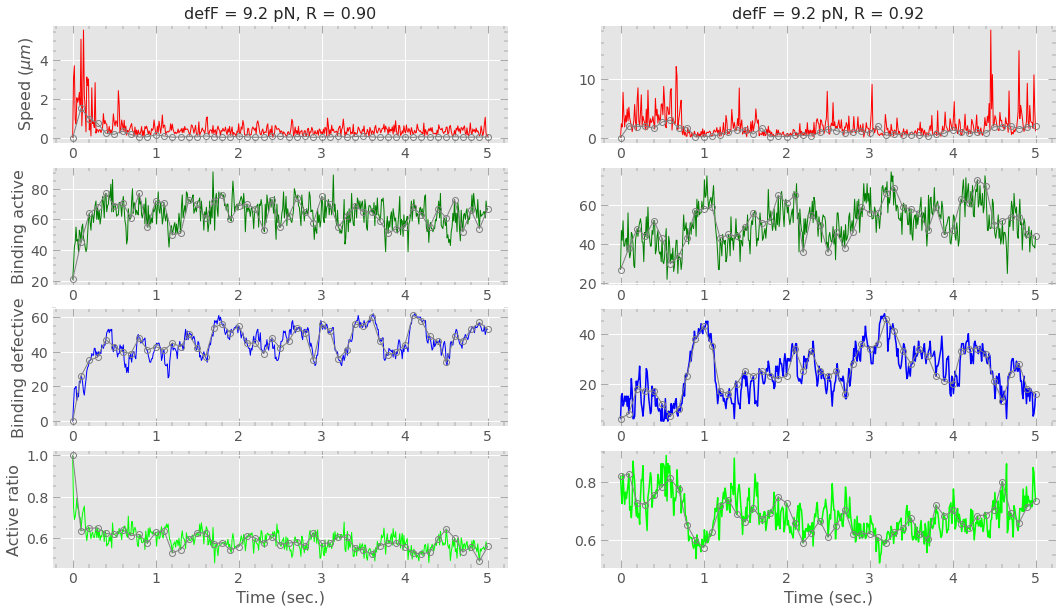

In [9]:
fig, ax = plt.subplots(4,2,figsize=(18,10))
x = np.linspace(0,5,501)

ax[0,0].plot(x,dta[1]['spd'], markerfacecolor='None', lw=1,color='red')
ax[0,0].plot(x[0::10],dta01[1]['spd'], marker='o',markerfacecolor='None', lw=1, color='gray')
ax[0,0].set_ylabel('Speed ($\mu m$)', fontsize=16)
ax[0,0].set_title('defF = 9.2 pN, R = 0.90', fontsize=16)
ax[0,0].minorticks_on()
ax[0,0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[0,0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

ax[1,0].plot(x,dta[1]['act'], markerfacecolor='None', lw=1,color='green')
ax[1,0].plot(x[0::10],dta01[1]['act'], marker='o',markerfacecolor='None', lw=1,color='gray')
ax[1,0].set_ylabel('Binding active', fontsize=16)
ax[1,0].minorticks_on()
ax[1,0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[1,0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

ax[2,0].plot(x,dta[1]['def'], markerfacecolor='None', lw=1,color='blue')
ax[2,0].plot(x[0::10],dta01[1]['def'], marker='o',markerfacecolor='None', lw=1,color='gray')
ax[2,0].set_ylabel('Binding defective', fontsize=16)
ax[2,0].minorticks_on()
ax[2,0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[2,0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

ax[3,0].plot(x,dta[1]['rto'], markerfacecolor='None', lw=1,color='lime')
ax[3,0].plot(x[0::10],dta01[1]['rto'], marker='o',markerfacecolor='None', lw=1,color='gray')
ax[3,0].set_xlabel('Time (sec.)', fontsize=16)
ax[3,0].set_ylabel('Active ratio', fontsize=16)
ax[3,0].minorticks_on()
ax[3,0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[3,0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)
#==================================================================
ax[0,1].plot(x,dta[2]['spd'], markerfacecolor='None', lw=1,color='red')
ax[0,1].plot(x[0::10],dta01[2]['spd'], marker='o',markerfacecolor='None', lw=1,color='gray')
ax[0,1].set_title('defF = 9.2 pN, R = 0.92', fontsize=16)
ax[0,1].minorticks_on()
ax[0,1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[0,1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

ax[1,1].plot(x,dta[2]['act'],markerfacecolor='None', lw=1, color='green')
ax[1,1].plot(x[0::10],dta01[2]['act'], marker='o',markerfacecolor='None', lw=1,color='gray')
ax[1,1].minorticks_on()
ax[1,1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[1,1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

ax[2,1].plot(x,dta[2]['def'], color='blue')
ax[2,1].plot(x[0::10],dta01[2]['def'], marker='o',markerfacecolor='None', lw=1,color='gray')
ax[2,1].minorticks_on()
ax[2,1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[2,1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

ax[3,1].plot(x,dta[2]['rto'], color='lime')
ax[3,1].plot(x[0::10],dta01[2]['rto'], marker='o',markerfacecolor='None', lw=1,color='gray')
ax[3,1].set_xlabel('Time (sec.)', fontsize=16)
ax[3,1].minorticks_on()
ax[3,1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[3,1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

#plt.savefig('fig/speed_binding_corr_F4.6-9.2pN.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/speed_BM_rto_R9.0-9.2.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.close()

<AxesSubplot:xlabel='spd', ylabel='Count'>

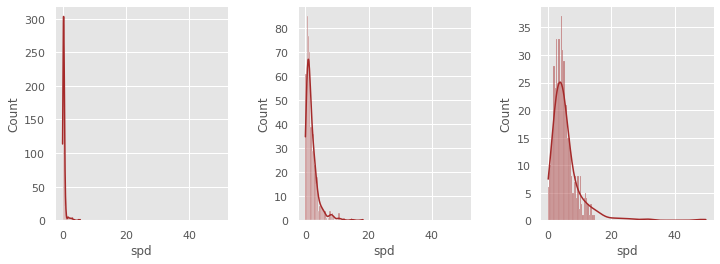

In [47]:
fig, ax = plt.subplots(1,3,figsize=(30*cm,10*cm), sharex=True)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.5)

bins = np.arange(0,15,0.4)

sns.histplot(dta[1]['spd'],kde=True, bins=bins, color='brown', ax=ax[0])
sns.histplot(dta[2]['spd'],kde=True, bins=bins, color='brown', ax=ax[1])
sns.histplot(dta[3]['spd'],kde=True, bins=bins, color='brown', ax=ax[2])

#plt.savefig('fig/speed_hist_R9.0-9.4.pdf', format='pdf', dpi=500, bbox_inches='tight')

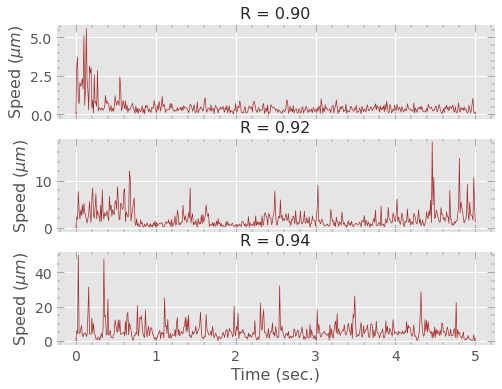

In [58]:
fig, ax = plt.subplots(3,1,figsize=(20*cm,15*cm), sharex=True)

ax[0].plot(x,dta[1]['spd'], markerfacecolor='None', lw=0.7,color='brown')
#ax[0].plot(x[0::10],dta01[1]['spd'], marker='o',markerfacecolor='None', lw=1, color='gray')
ax[0].set_ylabel('Speed ($\mu m$)', fontsize=16)
ax[0].set_title('R = 0.90', fontsize=16)
ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

#==================================================================
ax[1].plot(x,dta[2]['spd'], markerfacecolor='None', lw=0.7,color='brown')
#ax[1].plot(x[0::10],dta01[2]['spd'], marker='o',markerfacecolor='None', lw=1,color='gray')
ax[1].set_title('R = 0.92', fontsize=16)
ax[1].set_ylabel('Speed ($\mu m$)', fontsize=16)
ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

#==================================================================
ax[2].plot(x,dta[3]['spd'], markerfacecolor='None', lw=0.7,color='brown')
#ax[2].plot(x[0::10],dta01[2]['spd'], marker='o',markerfacecolor='None', lw=1,color='gray')
ax[2].set_title('R = 0.94', fontsize=16)
ax[2].set_xlabel('Time (sec.)', fontsize=16)
ax[2].set_ylabel('Speed ($\mu m$)', fontsize=16)
ax[2].minorticks_on()
ax[2].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[2].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

#plt.savefig('fig/speed_R0.90-0.94.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/speed_R0.90-0.94.png', format='png', dpi=700, bbox_inches='tight')
#plt.close()

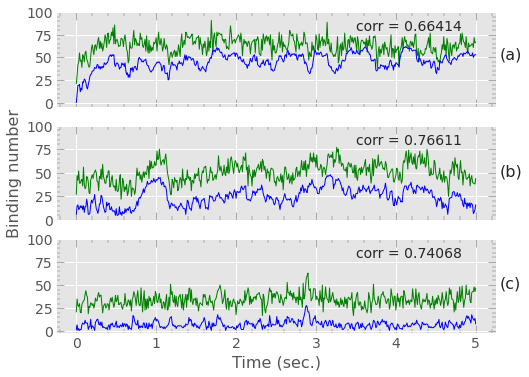

In [9]:
fig, ax = plt.subplots(3,1,figsize=(20*cm,15*cm), sharex=True)
x = np.linspace(0,5,501)

corr = round(dta01[1]['act'].corr(dta01[1]['def']),5)
ax[0].plot(x,dta[1]['act'], lw=1,color='green')
ax[0].plot(x,dta[1]['def'], lw=1,color='blue')
ax[0].set_yticks(np.arange(0,101,25))
ax[0].text(3.5,80,'corr = '+str(corr), fontsize=14)
ax[1].text(5.3,170,'(a)', fontsize=16)
ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

#==================================================================
corr = round(dta01[2]['act'].corr(dta01[2]['def']),5)
ax[1].plot(x,dta[2]['act'], lw=1,color='green')
ax[1].plot(x,dta[2]['def'], lw=1,color='blue')
ax[1].set_yticks(np.arange(0,101,25))
ax[1].text(3.5,80,'corr = '+str(corr), fontsize=14)
ax[1].set_ylabel('Binding number', fontsize=16)
ax[1].text(5.3,47,'(b)', fontsize=16)
ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

#==================================================================
corr = round(dta01[3]['act'].corr(dta01[3]['def']),5)
ax[2].plot(x,dta[3]['act'], lw=1,color='green')
ax[2].plot(x,dta[3]['def'], lw=1,color='blue')
ax[2].set_yticks(np.arange(0,101,25))
ax[2].text(3.5,80,'corr = '+str(corr), fontsize=14)
ax[2].set_xlabel('Time (sec.)', fontsize=16)
ax[2].text(5.3,47,'(c)', fontsize=16)
ax[2].minorticks_on()
ax[2].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[2].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

#plt.savefig('fig/bindingMr0.90-0.94.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.close()

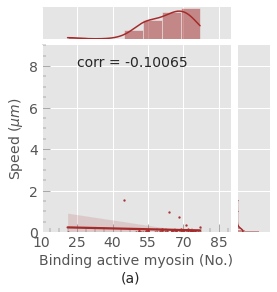

In [13]:
data = dta01[1] # R0.90
#-------------------------
# x = 'rto' #% -- uncomment for active binding ratio
# xmin = 0.2; xmax = 1.01; xstep = 0.2
# figName = 'corr090' #%
#-------------------------
x = 'act' #bm -- active binding number
xmin = 10; xmax = 90; xstep = 15
figName = 'corr090bm' #bm
#-------------------------
y = 'spd'
ymin = 0; ymax = 9; ystep = 2
#-------------------------
# x = 'def' # def
# y  = 'act'
# xmin = 0; xmax = 65; xstep = 15
# ymin = 20; ymax = 96; ystep = 15
# figName = 'corr090def' # def
#-------------------------
figLabel = '(a)'
#========================================
g = sns.jointplot(data=data, x=x, y=y, kind='reg',xlim=(xmin,xmax),ylim=(ymin,ymax), height=10*cm, color='brown', scatter_kws={'s':2})
#.annotate(stats.pearsonr)
corr = data[x].corr(data[y])
#========================================
g.ax_joint.minorticks_on()
g.ax_joint.tick_params('both',direction='in',top=False,right=False,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
g.ax_joint.tick_params('both',direction='in',top=False,right=False,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)
g.ax_joint.set_yticks(np.arange(ymin,ymax,ystep))
g.ax_joint.set_xticks(np.arange(xmin,xmax,xstep))
g.ax_joint.set_ylabel('Speed ($\mu m$)', fontsize=14)
#========================================% -- uncomment this for %
# plt.text(0.4,6,'corr = '+str(round(corr,5)), fontsize=14)
# plt.text(0.6,-2.7,figLabel, ha='center', fontsize=14)
# g.ax_joint.set_xlabel('Binding active myosin ($\%$)', fontsize=14)
#plt.savefig('fig/'+figName+'.pdf', format='pdf', dpi=500, bbox_inches='tight')
#=======================================bm -- uncomment this for bm
plt.text(25,8,'corr = '+str(round(corr,5)), fontsize=14)
plt.text(47.5,-2.4,figLabel, ha='center', fontsize=14)
g.ax_joint.set_xlabel('Binding active myosin (No.)', fontsize=14)
#plt.savefig('fig/'+figName+'.pdf', format='pdf', dpi=500, bbox_inches='tight')
#=======================================def
#g.ax_joint.set_xlabel('Binding defective myosin (No.)', fontsize=14)
#g.ax_joint.set_ylabel('Binding active myosin (No.)', fontsize=14)
#plt.text(15,80,'corr = '+str(round(corr,5)), fontsize=14)
#plt.text(30,-0.3,figLabel, ha='center', fontsize=14)
#plt.savefig('fig/'+figName+'.pdf', format='pdf', dpi=500, bbox_inches='tight')

plt.show()

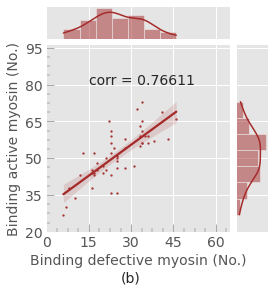

In [76]:
data = dta01[2] # R0.92
#-------------------------
# x = 'rto' #% -- uncomment for active binding ratio
# xmin = 0.2; xmax = 1.01; xstep = 0.2
# figName = 'corr092' #%
#-------------------------
# x = 'act' #bm -- active binding number
# xmin = 10; xmax = 90; xstep = 15
# figName = 'corr092bm' #bm
#-------------------------
# y = 'spd'
# ymin = 0; ymax = 9; ystep = 2
#-------------------------
x = 'def' # def
y  = 'act'
xmin = 0; xmax = 65; xstep = 15
ymin = 20; ymax = 96; ystep = 15
figName = 'corr092def' # def
#-------------------------
figLabel = '(b)'
#========================================
g = sns.jointplot(data=data, x=x, y=y, kind='reg',xlim=(xmin,xmax),ylim=(ymin,ymax), height=10*cm, color='brown', scatter_kws={'s':2})
# , xlim=(0,0.9), ylim=(0,16) #.annotate(stats.pearsonr)
corr = data[x].corr(data[y])
#========================================
g.ax_joint.minorticks_on()
g.ax_joint.tick_params('both',direction='in',top=False,right=False,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
g.ax_joint.tick_params('both',direction='in',top=False,right=False,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)
g.ax_joint.set_yticks(np.arange(ymin,ymax,ystep))
g.ax_joint.set_xticks(np.arange(xmin,xmax,xstep))
g.ax_joint.set_ylabel('Speed ($\mu m$)', fontsize=14)
#========================================% -- uncomment this for %
# plt.text(0.4,6,'corr = '+str(round(corr,5)), fontsize=14)
# plt.text(0.6,-2.7,figLabel, ha='center', fontsize=14)
# g.ax_joint.set_xlabel('Binding active myosin ($\%$)', fontsize=14)
#plt.savefig('fig/'+figName+'.pdf', format='pdf', dpi=500, bbox_inches='tight')
#=======================================bm -- uncomment this for bm
# plt.text(25,8,'corr = '+str(round(corr,5)), fontsize=14)
# plt.text(47.5,-2.5,figLabel, ha='center', fontsize=14)
# g.ax_joint.set_xlabel('Binding active myosin (No.)', fontsize=14)
#plt.savefig('fig/'+figName+'.pdf', format='pdf', dpi=500, bbox_inches='tight')
#=======================================
g.ax_joint.set_xlabel('Binding defective myosin (No.)', fontsize=14)
g.ax_joint.set_ylabel('Binding active myosin (No.)', fontsize=14)
plt.text(15,80,'corr = '+str(round(corr,5)), fontsize=14)
plt.text(30,-0.3,figLabel, ha='center', fontsize=14)
#plt.savefig('fig/'+figName+'.pdf', format='pdf', dpi=500, bbox_inches='tight')

plt.show()

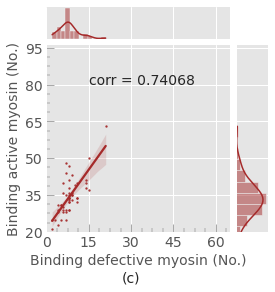

In [75]:
data = dta01[3] # R0.94
#-------------------------
# x = 'rto' #% -- uncomment for active binding ratio
# xmin = 0.2; xmax = 1.01; xstep = 0.2
# figName = 'corr094' #%
#-------------------------
# x = 'act' #bm -- active binding number
# xmin = 10; xmax = 90; xstep = 15
# figName = 'corr094bm' #bm
#-------------------------
# y = 'spd'
# ymin = 0; ymax = 9; ystep = 2
#-------------------------
x = 'def' # def
y  = 'act'
xmin = 0; xmax = 65; xstep = 15
ymin = 20; ymax = 96; ystep = 15
figName = 'corr094def' # def
#-------------------------
figLabel = '(c)'
#========================================
g = sns.jointplot(data=data, x=x, y=y, kind='reg',xlim=(xmin,xmax),ylim=(ymin,ymax), height=10*cm, color='brown', scatter_kws={'s':2})
# , xlim=(0,0.9), ylim=(0,16) #.annotate(stats.pearsonr)
corr = data[x].corr(data[y])
#========================================
g.ax_joint.minorticks_on()
g.ax_joint.tick_params('both',direction='in',top=False,right=False,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
g.ax_joint.tick_params('both',direction='in',top=False,right=False,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)
g.ax_joint.set_yticks(np.arange(ymin,ymax,ystep))
g.ax_joint.set_xticks(np.arange(xmin,xmax,xstep))
g.ax_joint.set_ylabel('Speed ($\mu m$)', fontsize=14)
#========================================% -- uncomment this for %
# plt.text(0.4,6,'corr = '+str(round(corr,5)), fontsize=14)
# plt.text(0.6,-2.7,figLabel, ha='center', fontsize=14)
# g.ax_joint.set_xlabel('Binding active myosin ($\%$)', fontsize=14)
#plt.savefig('fig/'+figName+'.pdf', format='pdf', dpi=500, bbox_inches='tight')
#=======================================bm -- uncomment this for bm
# plt.text(25,8,'corr = '+str(round(corr,5)), fontsize=14)
# plt.text(47.5,-2.5,figLabel, ha='center', fontsize=14)
# g.ax_joint.set_xlabel('Binding active myosin (No.)', fontsize=14)
#plt.savefig('fig/'+figName+'.pdf', format='pdf', dpi=500, bbox_inches='tight')
#=======================================
g.ax_joint.set_xlabel('Binding defective myosin (No.)', fontsize=14)
g.ax_joint.set_ylabel('Binding active myosin (No.)', fontsize=14)
plt.text(15,80,'corr = '+str(round(corr,5)), fontsize=14)
plt.text(30,-0.3,figLabel, ha='center', fontsize=14)
#plt.savefig('fig/'+figName+'.pdf', format='pdf', dpi=500, bbox_inches='tight')

plt.show()

In [78]:
#!pdfjam --nup 3x1 --papersize '{13cm,5cm}' fig/corr090.pdf fig/corr092.pdf fig/corr094.pdf --outfile fig/corr090-094.pdf
#!pdfjam --nup 3x1 --papersize '{13cm,5cm}' fig/corr090bm.pdf fig/corr092bm.pdf fig/corr094bm.pdf --outfile fig/corr090-094bm.pdf
#!pdfjam --nup 3x1 --papersize '{13cm,5cm}' fig/corr090def.pdf fig/corr092def.pdf fig/corr094def.pdf --outfile fig/corr090-094def.pdf

          ----
  pdfjam: This is pdfjam version 2.08.
  pdfjam: Reading any site-wide or user-specific defaults...
          (none found)
  pdfjam: Effective call for this run of pdfjam:
          /usr/bin/pdfjam --nup '3x1' --papersize '{13cm,5cm}' --outfile fig/corr090-094.pdf -- fig/corr090.pdf - fig/corr092.pdf - fig/corr094.pdf - 
  pdfjam: Calling pdflatex...
  pdfjam: Finished.  Output was to 'fig/corr090-094.pdf'.
          ----
  pdfjam: This is pdfjam version 2.08.
  pdfjam: Reading any site-wide or user-specific defaults...
          (none found)
  pdfjam: Effective call for this run of pdfjam:
          /usr/bin/pdfjam --nup '3x1' --papersize '{13cm,5cm}' --outfile fig/corr090-094bm.pdf -- fig/corr090bm.pdf - fig/corr092bm.pdf - fig/corr094bm.pdf - 
  pdfjam: Calling pdflatex...
  pdfjam: Finished.  Output was to 'fig/corr090-094bm.pdf'.
          ----
  pdfjam: This is pdfjam version 2.08.
  pdfjam: Reading any site-wide or user-specific defaults...
          (none found)


In [11]:
!pdfjoin fig/corr090.pdf fig/corr092.pdf fig/corr094.pdf

          ----
  pdfjam: This is pdfjam version 2.08.
  pdfjam: Reading any site-wide or user-specific defaults...
          (none found)
  pdfjam: Effective call for this run of pdfjam:
          /usr/bin/pdfjam --fitpaper 'true' --rotateoversize 'true' --suffix joined -- fig/corr090.pdf - fig/corr092.pdf - fig/corr094.pdf - 
  pdfjam: Calling pdflatex...
  pdfjam: Finished.  Output was to '/home/nitta/Documents/sam/ACTIN-MYOSIN/2021/actinmyosin2/Analysis/Correlation/corr094-joined.pdf'.


In [21]:
!jupyter nbconvert 09-03-2021_Corr_v11n.ipynb --no-input --to html

[NbConvertApp] Converting notebook 09-03-2021_Corr_v11n.ipynb to html
[NbConvertApp] Writing 1120062 bytes to 09-03-2021_Corr_v11n.html
